Proyecto 1 BI
Tema: Datos Peliculas

# Librerias

In [88]:
import string

import numpy as np
import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score

import pickle

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn import tree

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline

# Set Up Inicial

In [89]:
pd.set_option('display.max_colwidth', None)

In [90]:
# Descargando las stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /Users/pipe/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [91]:
# Función para tokenizar los tweets
def tokenizer(text):
    tt = TweetTokenizer()
    return tt.tokenize(text)

# Cargar Info

In [92]:
tweets_df = pd.read_csv('/Users/pipe/Desktop/GitHub/BI/Etapa 1/Archivos/MovieReviews.csv', sep = ',')

In [93]:
tweets_df.shape

(5000, 3)

In [94]:
tweets_df.sample(5)

,Unnamed: 0,review_es,sentimiento
2268,2268,"Richard Abernethie, un hombre muy rico, ha muerto y sus parientes se han reunido por su funeral. Incluido en la fiesta funeraria es la hermana más joven de Abernathie Cora Galaccio. Si bien nada de la familia ha visto CORA en al menos 20 años, todos están de acuerdo en que Cora siempre fue un poco diferente. Entonces, cuando Cora dice algo acerca de Abemethie, habiendo sido asesinado, la mayoría se ríe como una de las excentricies de CORA. Pero alguien está obviamente tomando en serio cora. Al día siguiente, Cora se encuentra muerto en su cama, ha sido golpeado violentamente. ¿Hay alguna conexión entre las dos muertes? Depende de Hercule Poirot encontrar un asesino. Después del funeral es uno de los episodios más bien preparados de toda la serie Poirot. Siempre he sido fanático de este libro de Agatha Christie en particular y, por lo que recuerdo, la película es tan fiel al material de origen de Christie como cualquiera de las cuotas de Poirot. El misterio es de primera categoría con muchas pistas, sospechosos y bastones rojos. Y como he escrito antes, siempre disfruto de una historia de Christie, donde Hercule Poirot reúne a todos juntos en un salón para la revelación final. Podría ser pasado de moda, pero así es como me gusta. Llegando más allá de la trama, técnica y artística después de que el funeral sea un ganador. Los conjuntos, edición, dirección y cinematografía son tan buenos como encontrarás en una de estas películas. La actuación es igualmente impresionante. He llegado a esperar una actuación agradable de David Sucha como Poirot y él no decepciona aquí. El resto del elenco es tan fuerte con Monica Dolan que da un rendimiento especialmente notable. Aparte de un producto menor con la forma en que se introduce los personajes de fuego rápido, no tengo ninguna queja reales. Es un buen espectáculo todo el camino.",positivo
1461,1461,"""El desfile del pie"" es fascinante en tantos niveles. De hecho, no hay forma de que los ""prólogos del teatro"" supuestamente organizados puedan haberse producido en cualquier teatro en la Tierra, por supuesto. Piense en las enormes piscinas y fuentes altas de tres pisos para ""por una cascada"", por ejemplo. (Berkeley dirigió a John Garfield en ""Me hicieron un criminal"" seis años más tarde y hicieron que los niños perdidos cantaban ""por una cascada"" cuando tomaban sus duchas). ""Shanghai lil"" es el mejor número de producción en la imagen. Es un catálogo de '30s Warner Bros. Sensibilidades. Tenga en cuenta los chicos africanos mezclados en la escena con prostitutas blancas y asiáticas. Nunca verías a los negros integrados en una escena social en otras películas del período, a menos que fueran porteros en un tren o criada en una casa grande. Aquí los chicos negros están sentados en el bar y cantando con los demás. También tengo una emoción cuando los bailarines militares hacen una presentación de ""sección de tarjeta"" de la imagen de Roosevelt. También está el NRA Eagle: el logotipo de la controvertida administración de recuperación nacional del nuevo acuerdo. FDR fue el nuevo presidente y las esperanzas eran tan altos que sacaba a la nación de la depresión. Nunca verías algo tan trabajador orientado a la clase que sale de MGM, por supuesto. Warner Bros. De todo corazón apoyó el levantamiento dictado por el F.D.R. administración. Querida señorita Miss Ruby Keeler nunca fue mejor de lo que ella está jugando a la puta china, ""Lil"". Apenas ni siquiera mira los pies mientras baila, que era una de sus fallas de firma. Las cosas pre-código son divertidas. El número ""por una cascada"" es maravilloso en ese sentido. Las chicas cambian a sus trajes de baño en el autobús lleno de gente a través de Times Square con todas sus luces. Las chicas de águila extendida que nadan sobre la cámara proporcionan el tipo de tiros de entrepierna que no se verían durante 35 años. En pocos meses, el código de producción eliminaría tales placeres traviesos.",positiv

In [95]:
tweets_df['sentimiento'].value_counts(dropna = False, normalize = True)

positivo    0.5
negativo    0.5
Name: sentimiento, dtype: float64

# Filtrando Tuits No Etiquetados

In [96]:
tweets_labeled_df = tweets_df.loc[tweets_df['sentimiento'].notnull()]

In [97]:
# Tweets a ser usados para entrenar y evaluar el modelo
tweets_labeled_df.shape

(5000, 3)

In [98]:
# Tweets descartados debido a que no se encuentran etiquetados
tweets_df.loc[tweets_df['sentimiento'].isnull()].shape

(0, 3)

In [99]:
tweets_df['sentimiento'].value_counts(dropna = False, normalize = True)

positivo    0.5
negativo    0.5
Name: sentimiento, dtype: float64

#Conjuntos de Prueba

In [100]:
tweets_df['sentimiento'] = tweets_df['sentimiento'].map({'positivo': 1, 'negativo': 0})

In [101]:
tweets_df['sentimiento'].unique()

array([1, 0])

In [102]:
X_train, X_test, y_train, y_test = train_test_split(tweets_df['review_es'], tweets_df['sentimiento'], test_size = 0.2, stratify = tweets_df['sentimiento'], random_state = 1)

In [103]:
X_train.shape

(4000,)

In [104]:
pd.Series(y_train).value_counts(normalize = True)

0    0.5
1    0.5
Name: sentimiento, dtype: float64

In [105]:
X_test.shape

(1000,)

In [106]:
pd.Series(y_test).value_counts(normalize = True)

0    0.5
1    0.5
Name: sentimiento, dtype: float64

# Vectorización de Tuits

In [107]:
stop_words=list(stop_words)

In [108]:
bow = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words, lowercase = True)

In [109]:
X_bow = bow.fit_transform(X_train)

In [110]:
len(bow.vocabulary_)

58404

In [111]:
tfidf = TfidfVectorizer(tokenizer = tokenizer, stop_words = stop_words, lowercase = True)

In [112]:
X_tfidf = tfidf.fit_transform(X_train)

In [113]:
len(tfidf.vocabulary_)

58404

# Entreno con Bow

In [114]:
bow_model = RandomForestClassifier(random_state = 2)

In [115]:
bow_model.fit(X_bow, y_train)

RandomForestClassifier(random_state=2)

<AxesSubplot:>

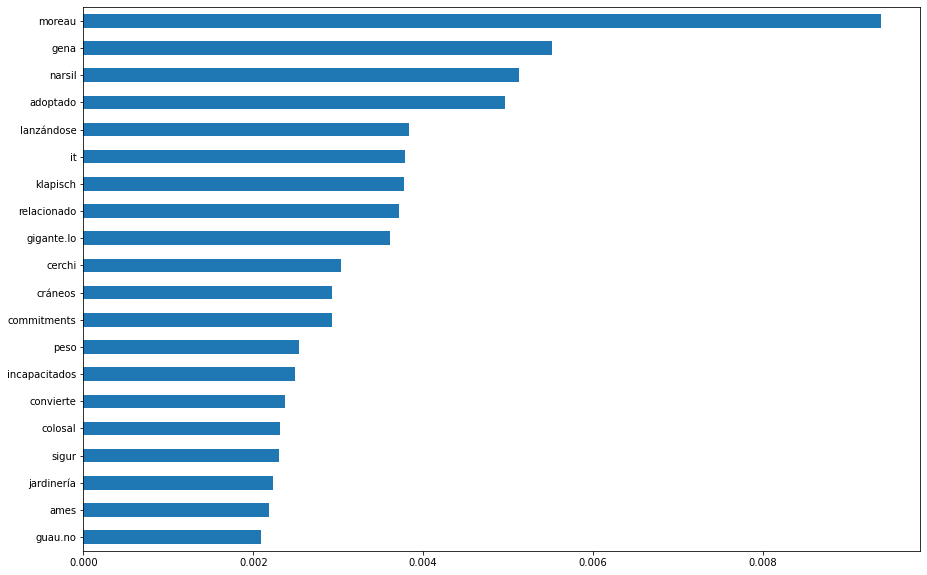

In [116]:
# La 'feature importance' en modelos basados en árboles de decisión indican cuales son las características más importantes al momento de tomar una decisión
pd.Series(bow_model.feature_importances_, index = bow.vocabulary_).sort_values().tail(20).plot.barh(figsize = (15, 10))

In [117]:
bow_estimators = bow_model.estimators_
print('Number of trees:', len(bow_estimators))
print('Trees depth (mean):', np.mean([tree.get_depth() for tree in bow_estimators]))

Number of trees: 100
Trees depth (mean): 185.1


In [118]:
y_train_bow_predict = bow_model.predict(X_bow)
y_test_bow_predict = bow_model.predict(bow.transform(X_test))

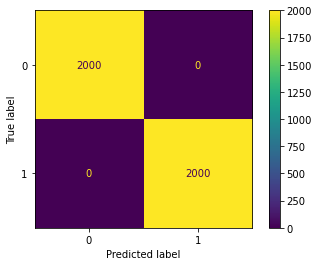

In [119]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_bow_predict)

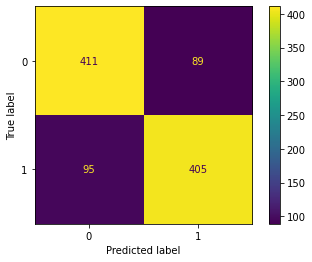

In [120]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_bow_predict)

In [121]:
if len(bow_model.classes_) == 2:
    print('Precision:', precision_score(y_train, y_train_bow_predict, pos_label = 1))
    print('Recall:', recall_score(y_train, y_train_bow_predict, pos_label = 1))
    print('F1:', f1_score(y_train, y_train_bow_predict, pos_label = 1))
else:
    # Para casos no binarios, es común calcular las métricas para cada clase
    print('Precision:', precision_score(y_train, y_train_bow_predict, average = None))
    print('Recall:', recall_score(y_train, y_train_bow_predict, average = None))
    print('F1:', f1_score(y_train, y_train_bow_predict, average = None))

Precision: 1.0
Recall: 1.0
F1: 1.0


In [122]:
if len(bow_model.classes_) == 2:
    print('Precision:', precision_score(y_test, y_test_bow_predict, pos_label = 1))
    print('Recall:', recall_score(y_test, y_test_bow_predict, pos_label = 1))
    print('F1:', f1_score(y_test, y_test_bow_predict, pos_label = 1))
else:
    # Para casos no binarios, es común calcular las métricas para cada clase
    print('Precision:', precision_score(y_test, y_test_bow_predict, average = None))
    print('Recall:', recall_score(y_test, y_test_bow_predict, average = None))
    print('F1:', f1_score(y_test, y_test_bow_predict, average = None))

Precision: 0.819838056680162
Recall: 0.81
F1: 0.8148893360160966


# Evaluando e utilizando TF-IDF

In [123]:
tfidf_model = RandomForestClassifier(random_state = 3)

In [124]:
tfidf_model.fit(X_tfidf, y_train)

RandomForestClassifier(random_state=3)

<AxesSubplot:>

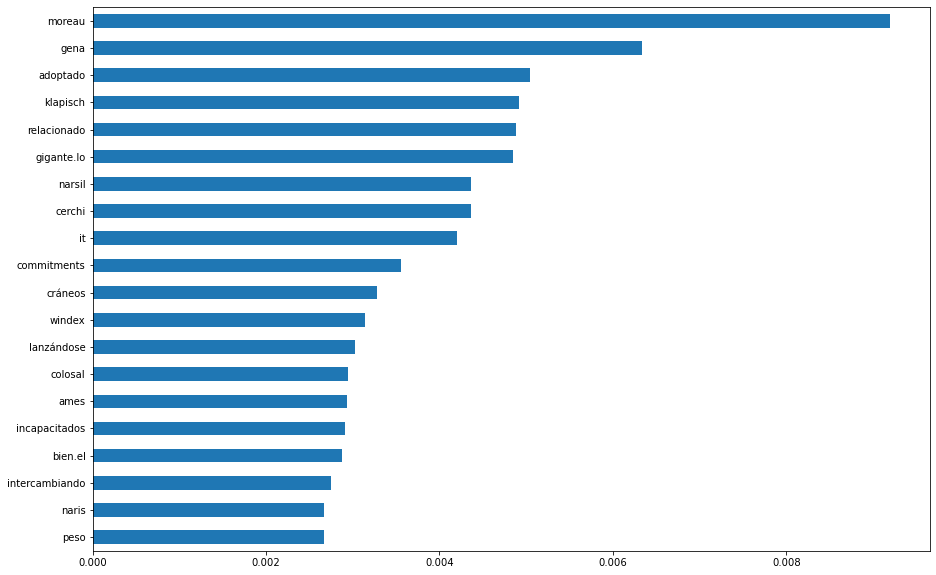

In [125]:
pd.Series(tfidf_model.feature_importances_, index = tfidf.vocabulary_).sort_values().tail(20).plot.barh(figsize = (15, 10))

In [126]:
tfidf_estimators = tfidf_model.estimators_
print('Number of trees:', len(tfidf_estimators))
print('Trees depth (mean):', np.mean([tree.get_depth() for tree in tfidf_estimators]))

Number of trees: 100
Trees depth (mean): 162.79


In [127]:
y_train_tfidf_predict = tfidf_model.predict(X_tfidf)
y_test_tfidf_predict = tfidf_model.predict(tfidf.transform(X_test))

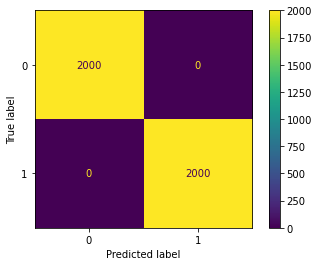

In [128]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_predict)

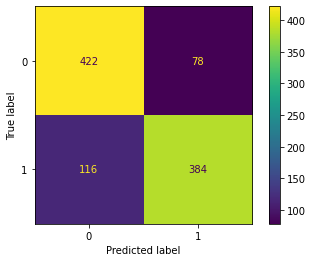

In [129]:
ConfusionMatrixDisplay.from_predictions(y_test,y_test_tfidf_predict)

In [130]:
if len(bow_model.classes_) == 2:
    print('Precision:', precision_score(y_train, y_train_tfidf_predict, pos_label = 1))
    print('Recall:', recall_score(y_train, y_train_tfidf_predict, pos_label = 1))
    print('F1:', f1_score(y_train, y_train_tfidf_predict, pos_label = 1))
else:
    # Para casos no binarios, es común calcular las métricas para cada clase
    print('Precision:', precision_score(y_train, y_train_tfidf_predict, average = None))
    print('Recall:', recall_score(y_train, y_train_tfidf_predict, average = None))
    print('F1:', f1_score(y_train, y_train_tfidf_predict, average = None))

Precision: 1.0
Recall: 1.0
F1: 1.0


In [131]:
if len(tfidf_model.classes_) == 2:
    print('Precision:', precision_score(y_test, y_test_tfidf_predict, pos_label = 1))
    print('Recall:', recall_score(y_test, y_test_tfidf_predict, pos_label = 1))
    print('F1:', f1_score(y_test, y_test_tfidf_predict, pos_label = 1))
else:
    # Para casos no binarios, es común calcular las métricas para cada clase
    print('Precision:', precision_score(y_test, y_test_tfidf_predict, average = None))
    print('Recall:', recall_score(y_test, y_test_tfidf_predict, average = None))
    print('F1:', f1_score(y_test, y_test_tfidf_predict, average = None))

Precision: 0.8311688311688312
Recall: 0.768
F1: 0.7983367983367984


# Limpieza de Datos y decisión de tipo de vectorización (Bag of Words)

Mejores resultados Bow entonces trabajaremos con ese. Pero sin incluir los tokens de aparición de 1 solo caso.

In [132]:
stop_words=list(stop_words)

In [133]:
bow = CountVectorizer(tokenizer = tokenizer, stop_words = stop_words, lowercase = True, min_df=2)

In [134]:
X_bow = bow.fit_transform(X_train)

In [135]:
len(bow.vocabulary_)

24988

In [136]:
tfidf = TfidfVectorizer(tokenizer = tokenizer, stop_words = stop_words, lowercase = True)

In [137]:
X_tfidf = tfidf.fit_transform(X_train)

In [138]:
len(tfidf.vocabulary_)

58404

# Análisis del error


In [139]:
error_df = pd.concat([
    pd.concat([X_test, y_test], axis = 1).reset_index(),
    pd.Series(y_test_bow_predict)
], axis = 1).rename(columns = { 'sentimiento': 'actual', 0: 'predicted' })

error_df.drop('index', inplace = True, axis = 1)

In [140]:
error_df.loc[error_df['actual'] != error_df['predicted']].shape

(184, 3)

In [141]:
error_df.loc[error_df['actual'] != error_df['predicted']].sample(10)

,review_es,actual,predicted
310,"Ugh, ¡qué episodio vergonzoso anoche!Era un script fallido para ""ABC Afterchool Special"", o el producto de un escritor de novato serio, simplemente fuera de la universidad, haciendo un homenaje a ese clásico PC Anti-pistola Homily desde 1974, ""The Gun"".De hecho, Hubby y se decepcionó de que el disparo de cierre no fuera de la arma que se derritiera como en la película! No, no soy un toque NRA.Es decir, cuando el productor de una serie inteligente y matizada lo entiende en su cabeza que debería estar sometido a una dramatización didáctica de su causa personal, lo apreciaría si la conferencia al menos no se entregó a través de 2 por-4.¡GEEZ! OK, la lección de sociología ha terminado.El mensaje ha sido entregado.Se ha emitido el episodio importante.Ahora vamos a volver a algunos episodios entretenidos que intenten respetar nuestra inteligencia.",1,0
99,"Fui a una pequeña proyección anticipada de esta película el 19 de julio, no conociendo más que los nombres de algunos de los actores y que era una búsqueda de fantasía / aventura de algún tipo. La línea de la trama realmente no es nada como si hubiera visto, Y una historia única es ciertamente apreciada con todo lo demás que está actualmente en o próximamente a los teatros. A pesar de lo que pueden dar las primeras impresiones, no es cursi, cursi, pegajoso o ridículo, y es en realidad muy entretenido y divertido. El flujo está bastante bien hecho, nada parece apresurado o arrastrado. La banda sonora, por falta de mejores palabras, es mágica y agrega mucho a la película, a diferencia de simplemente llenar el silencio, lo que a menudo sucede en las películas o la televisión. Y aunque podría haber sabido lo que viene en los puntos, todavía no podía soportar dejar de ver la pantalla; Para mi conocimiento, no una sola persona abandonó el teatro durante toda la película. My una queja es que parece que casi no hay marketing para esta película, y tan brillante como es, no puedo averiguar por qué.",1,0
936,"Para aquellos demasiado jóvenes para recordar, o demasiado viejos para haber sido parte de la ""exageración"", la moda Michael Jackson de los 80 de principios a mediados, se encontraba en una fiebre, como el bombo sobre Titanic, excepto que esto simplemente no hizo cejar. Cada canción, cada video, cada palabra emitida por Michael era importante. No se había visto nada similar desde el apogeo de los Beatles. Recuerdo haber visto este video por primera vez, en una pista de patinaje de rodillos. Todos dejaron de patinar. No había ninguna duda de si era un fanático de Michael Jackson o no; estabas. Todos se llenaban de la pantalla de proyección, y observaron el video ... Este es probablemente uno de los videos de música más largos jamás hechos, y definitivamente los mejores. Pérpetualmente obtiene el # 2 en el MTV anual Top 100 videos (# 1 es siempre el sabor de los meses, y de alguna manera lo que fue el número 1 de todos los tiempos más allá de # 2, para dar paso a la nueva # 1.. Ir Figura.), y Thriller se convirtió en un fenómeno en sí mismo. Si alguna vez tienes la oportunidad, debes ver el video; No solo los extractos mostrados en MTV o VH1. Si es necesario, debe buscar el thriller en una tienda de alquiler de video. Oye ... Tus padres probablemente te hicieron ver los Beatles y las imágenes de Woodstock porque ""Era importante"" ... Bueno, esto también es importante.",1,0
235,"Esta película debería haber sido mucho mejor de lo que era.Christopher Eccleston es un excelente actor, pero incluso él no pudo rescatar a esta historia de una joven que busca la verdad sobre la muerte de su hermana.ADVERTENCIA DE SPOILER: En efecto, la verdad es que la hermana mayor (interpretada por Díaz) es solo una chica mimada, egoísta y superficial que tomó demasiadas drogas.No hay mucho de un giro y no tan interesante tampoco.La película también se superpone con demasiados flashbacks y office Sovers y carece de ritmo dramático.Todo en todo esto definitivamente vale la 

# Metodo 1: KNN
Juan Felipe Patiño 201922857

In [142]:
knn_model = KNeighborsClassifier(n_neighbors = 3) # 5 neighbors is the default value

In [143]:
knn_model.fit(X_bow, y_train)

KNeighborsClassifier(n_neighbors=3)

In [144]:
bow.transform(X_test)

<1000x24988 sparse matrix of type '<class 'numpy.int64'>'
	with 99944 stored elements in Compressed Sparse Row format>

In [145]:
# Generación de predicciones para entrenamiento y test para el cálculo de errores
preds_train = knn_model.predict(X_bow)
preds_test = knn_model.predict(bow.transform(X_test))

In [146]:
# Se evalua la accuracy (1 - error) del "modelo" en ambos conjuntos en términos porcentuales: porcetaje de instancias bien etiquetadas:
print('Accuracy (train):', accuracy_score(y_train, preds_train))
print('Accuracy (test):', accuracy_score(y_test, preds_test))

Accuracy (train): 0.76375
Accuracy (test): 0.557


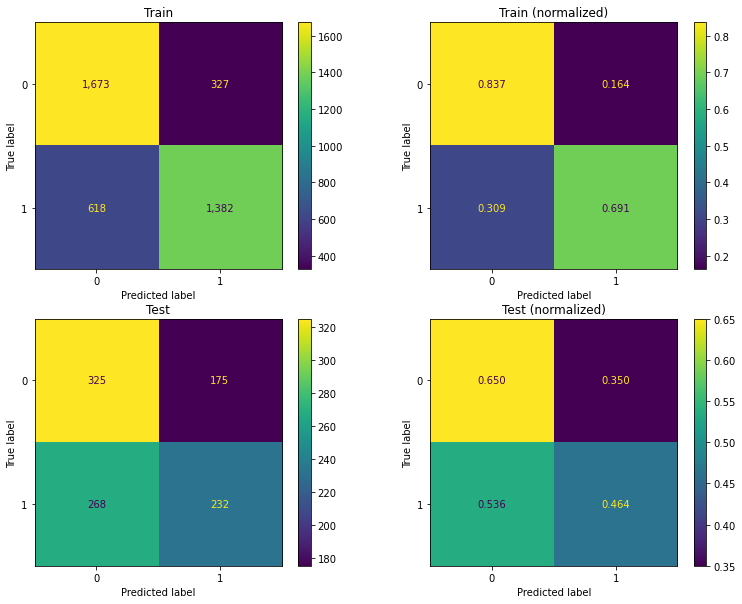

In [147]:
# Se empieza calculando la matriz de confusión

cm_train = confusion_matrix(y_train, preds_train, labels = knn_model.classes_)
cm_train_norm = confusion_matrix(y_train, preds_train, labels = knn_model.classes_, normalize = 'true')
cm_test = confusion_matrix(y_test, preds_test, labels = knn_model.classes_)
cm_test_norm = confusion_matrix(y_test, preds_test, labels = knn_model.classes_, normalize = 'true')

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (13, 10))
ConfusionMatrixDisplay(confusion_matrix = cm_train, display_labels = knn_model.classes_).plot(ax = ax1, values_format = ',.0f')
ConfusionMatrixDisplay(confusion_matrix = cm_train_norm, display_labels = knn_model.classes_).plot(ax = ax2, values_format = '.3f')
ConfusionMatrixDisplay(confusion_matrix = cm_test, display_labels = knn_model.classes_).plot(ax = ax3, values_format = ',.0f')
ConfusionMatrixDisplay(confusion_matrix = cm_test_norm, display_labels = knn_model.classes_).plot(ax = ax4, values_format = '.3f')

ax1.set_title('Train')
ax2.set_title('Train (normalized)')
ax3.set_title('Test')
ax4.set_title('Test (normalized)')
plt.show()

In [148]:
# Se calculan las diferentes métricas de error para una comparacion más directa:
pd.DataFrame([
    {
        'Train': accuracy_score(y_train, preds_train),
        'Test': accuracy_score(y_test, preds_test)
    },
    {
        'Train': precision_score(y_train, preds_train),
        'Test': precision_score(y_test, preds_test)
    },
    {
        'Train': recall_score(y_train, preds_train),
        'Test': recall_score(y_test, preds_test)
    },
    {
        'Train': f1_score(y_train, preds_train),
        'Test': f1_score(y_test, preds_test)
    }
], index = ['Accuracy', 'Precision', 'Recall', 'F1'])

,Train,Test
Accuracy,0.763750,0.557000
Precision,0.808660,0.570025
Recall,0.691000,0.464000
F1,0.745214,0.511577


# Metodo 2: Decision Tree
Juan Felipe Patiño 201922857

In [149]:
bow_model = RandomForestClassifier(random_state = 2)

In [150]:
bow_model.fit(X_bow, y_train)

RandomForestClassifier(random_state=2)

<AxesSubplot:>

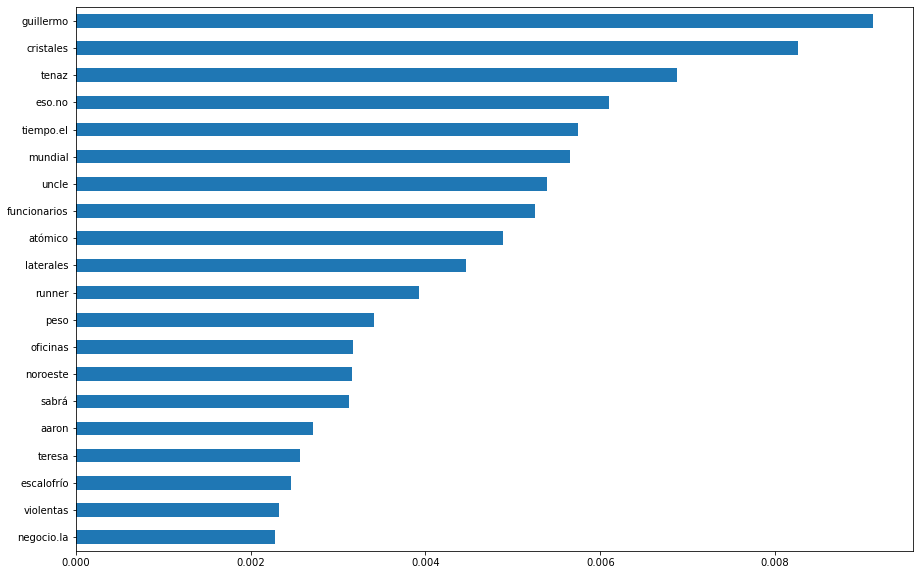

In [151]:
# La 'feature importance' en modelos basados en árboles de decisión indican cuales son las características más importantes al momento de tomar una decisión
pd.Series(bow_model.feature_importances_, index = bow.vocabulary_).sort_values().tail(20).plot.barh(figsize = (15, 10))

In [152]:
bow_estimators = bow_model.estimators_
print('Number of trees:', len(bow_estimators))
print('Trees depth (mean):', np.mean([tree.get_depth() for tree in bow_estimators]))

Number of trees: 100
Trees depth (mean): 152.33


In [153]:
y_train_bow_predict = bow_model.predict(X_bow)
y_test_bow_predict = bow_model.predict(bow.transform(X_test))

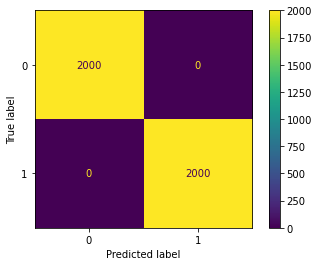

In [154]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_bow_predict)

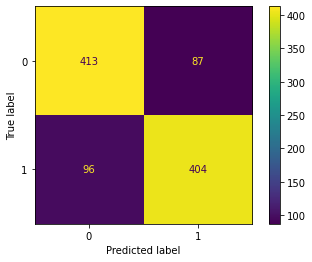

In [155]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_bow_predict)

In [156]:
if len(bow_model.classes_) == 2:
    print('Precision:', precision_score(y_train, y_train_bow_predict, pos_label = 1))
    print('Recall:', recall_score(y_train, y_train_bow_predict, pos_label = 1))
    print('F1:', f1_score(y_train, y_train_bow_predict, pos_label = 1))
else:
    # Para casos no binarios, es común calcular las métricas para cada clase
    print('Precision:', precision_score(y_train, y_train_bow_predict, average = None))
    print('Recall:', recall_score(y_train, y_train_bow_predict, average = None))
    print('F1:', f1_score(y_train, y_train_bow_predict, average = None))

Precision: 1.0
Recall: 1.0
F1: 1.0


In [157]:
if len(bow_model.classes_) == 2:
    print('Precision:', precision_score(y_test, y_test_bow_predict, pos_label = 1))
    print('Recall:', recall_score(y_test, y_test_bow_predict, pos_label = 1))
    print('F1:', f1_score(y_test, y_test_bow_predict, pos_label = 1))
else:
    # Para casos no binarios, es común calcular las métricas para cada clase
    print('Precision:', precision_score(y_test, y_test_bow_predict, average = None))
    print('Recall:', recall_score(y_test, y_test_bow_predict, average = None))
    print('F1:', f1_score(y_test, y_test_bow_predict, average = None))

Precision: 0.8228105906313645
Recall: 0.808
F1: 0.8153380423814329


# Metodo 3: Random Forest

Juan Ricardo Diaz - 201922167

In [158]:
forest_model = RandomForestClassifier(random_state = 2)

In [159]:
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [4, 5, 6], # Utilizamos alturas mucho más bajas ya gracias a que usamos "Bagging"
    'min_samples_split': [2, 3, 4, 5]
}

In [160]:
combinations = 1
for k, v in param_grid.items():
    combinations *= len(v)

print('Total de combinaciones a validar:', combinations)

Total de combinaciones a validar: 96


Como mencioné antes, vamos a tomar en cuenta únicamente el 50% de las combinaciones totales

In [161]:
# En este caso se decide buscar solo sobre el ~33% de las combinaciones
grid_forest_model = RandomizedSearchCV(forest_model, param_grid, n_iter = int(combinations / 2), scoring = ['precision', 'recall', 'f1'], refit = 'f1', cv = 10, n_jobs = -1, verbose = 1)

In [162]:
grid_forest_model.fit(X_bow, y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=2),
                   n_iter=48, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [4, 5, 6],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'n_estimators': [50, 100, 150, 200]},
                   refit='f1', scoring=['precision', 'recall', 'f1'],
                   verbose=1)

In [163]:
cv_results_df = pd.DataFrame(grid_forest_model.cv_results_)

In [164]:
cv_results_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_max_depth,param_criterion,params,split0_test_precision,...,split3_test_f1,split4_test_f1,split5_test_f1,split6_test_f1,split7_test_f1,split8_test_f1,split9_test_f1,mean_test_f1,std_test_f1,rank_test_f1
0,0.283655,0.027962,0.017448,0.003695,100,4,5,entropy,"{'n_estimators': 100, 'min_samples_split': 4, 'max_depth': 5, 'criterion': 'entropy'}",0.737069,...,0.799054,0.782201,0.810427,0.771930,0.788512,0.760291,0.780142,0.786256,0.013886,26
1,0.466948,0.028253,0.026963,0.007055,200,2,4,entropy,"{'n_estimators': 200, 'min_samples_split': 2, 'max_depth': 4, 'criterion': 'entropy'}",0.740088,...,0.816038,0.799076,0.816901,0.782178,0.782828,0.792453,0.775414,0.794617,0.013158,13
2,0.475049,0.031858,0.022257,0.002089,200,5,6,gini,"{'n_estimators': 200, 'min_samples_split': 5, 'max_depth': 6, 'criterion': 'gini'}",0.751073,...,0.826087,0.765258,0.806604,0.804938,0.824390,0.780952,0.780952,0.801519,0.019155,1
3,0.383078,0.025082,0.028157,0.007628,200,5,4,gini,"{'n_estimators': 200, 'min_samples_split': 5, 'max_depth': 4, 'criterion': 'gini'}",0.715481,...,0.819905,0.787037,0.836449,0.758105,0.800000,0.781991,0.765957,0.793386,0.022745,17
4,0.325474,0.029345,0.019273,0.004658,150,5,5,gini,"{'n_estimators': 150, 'min_samples_split': 5, 'max_depth': 5, 'criterion': 'gini'}",0.725000,...,0.811736,0.767059,0.801909,0.773869,0.811881,0.762590,0.801865,0.793708,0.020038,16


In [165]:
grid_forest_model.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'max_depth': 6,
 'criterion': 'gini'}

In [166]:
grid_forest_model.best_score_

0.80151877203947

In [167]:
best_forest_model_results_df = cv_results_df[[ c for c in cv_results_df.columns if 'split' in c][1:]].iloc[grid_forest_model.best_index_].reset_index()
best_forest_model_results_df['split'], best_forest_model_results_df['set'], best_forest_model_results_df['metric'] = zip(*list(best_forest_model_results_df['index'].apply(lambda x: x.split('_'))))
best_forest_model_results_df.rename(columns = {grid_forest_model.best_index_: 'value'}, inplace = True)
best_forest_model_results_df.drop(columns = 'index', inplace = True)

<AxesSubplot:xlabel='metric', ylabel='value'>

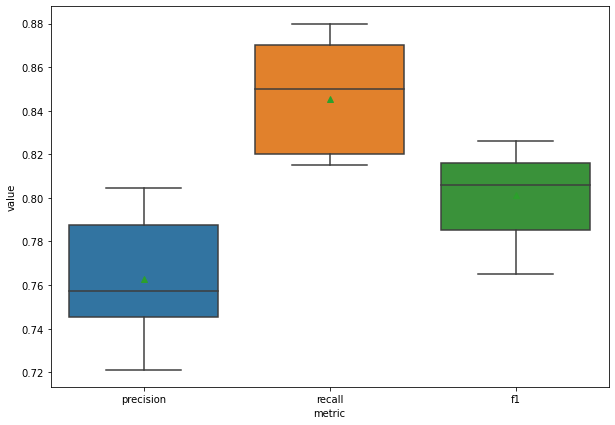

In [168]:
plt.figure(figsize = (10, 7))
sns.boxplot(x = 'metric', y = 'value', showmeans = True, data = best_forest_model_results_df)

In [169]:
preds_train = grid_forest_model.best_estimator_.predict(X_bow)
preds_test = grid_forest_model.best_estimator_.predict(bow.transform(X_test))

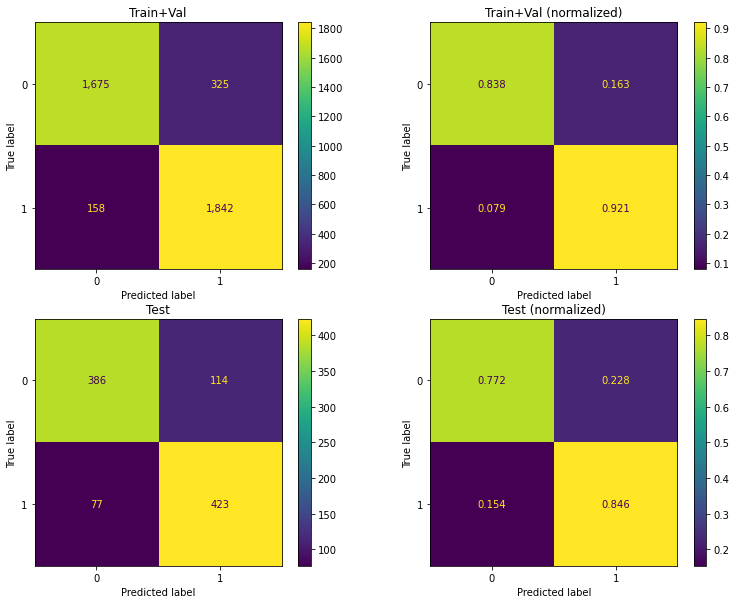

In [170]:
cm_train = confusion_matrix(y_train, preds_train, labels = grid_forest_model.best_estimator_.classes_)
cm_train_norm = confusion_matrix(y_train, preds_train, labels = grid_forest_model.best_estimator_.classes_, normalize = 'true')
cm_test = confusion_matrix(y_test, preds_test, labels = grid_forest_model.best_estimator_.classes_)
cm_test_norm = confusion_matrix(y_test, preds_test, labels = grid_forest_model.best_estimator_.classes_, normalize = 'true')

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (13, 10))
ConfusionMatrixDisplay(confusion_matrix = cm_train, display_labels = grid_forest_model.best_estimator_.classes_).plot(ax = ax1, values_format = ',.0f')
ConfusionMatrixDisplay(confusion_matrix = cm_train_norm, display_labels = grid_forest_model.best_estimator_.classes_).plot(ax = ax2, values_format = '.3f')
ConfusionMatrixDisplay(confusion_matrix = cm_test, display_labels = grid_forest_model.best_estimator_.classes_).plot(ax = ax3, values_format = ',.0f')
ConfusionMatrixDisplay(confusion_matrix = cm_test_norm, display_labels = grid_forest_model.best_estimator_.classes_).plot(ax = ax4, values_format = '.3f')

ax1.set_title('Train+Val')
ax2.set_title('Train+Val (normalized)')
ax3.set_title('Test')
ax4.set_title('Test (normalized)')
plt.show()

In [171]:
pd.DataFrame([
    {
        'Train+Val': accuracy_score(y_train, preds_train),
        'Test': accuracy_score(y_test, preds_test)
    },
    {
        'Train+Val': precision_score(y_train, preds_train),
        'Test': precision_score(y_test, preds_test)
    },
    {
        'Train+Val': recall_score(y_train, preds_train),
        'Test': recall_score(y_test, preds_test)
    },
    {
        'Train+Val': f1_score(y_train, preds_train),
        'Test': f1_score(y_test, preds_test)
    }
], index = ['Accuracy', 'Precision', 'Recall', 'F1'])

,Train+Val,Test
Accuracy,0.879250,0.809000
Precision,0.850023,0.787709
Recall,0.921000,0.846000
F1,0.884089,0.815815


# Pipeline Creation

In [172]:
from joblib import dump, load
from sklearn.pipeline import Pipeline
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

In [173]:
# Descargando las stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

# Función para tokenizar los tweets
def tokenizer(text):
    tt = TweetTokenizer()
    return tt.tokenize(text)

pipeline = Pipeline(
    [
    ('vectorizer', CountVectorizer(tokenizer=tokenizer, stop_words=stop_words, lowercase=True)),

    ]
)

pipe = pipeline.fit(X_train, y_train)

dump(pipe, 'modelo.joblib')

[nltk_data] Downloading package stopwords to /Users/pipe/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['modelo.joblib']

In [181]:
import joblib as jb
print(jb.__version__)

1.1.0


Ahora probemos que el joblib quedo bien

In [182]:
import joblib
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# load the trained joblib model
model = joblib.load('/Users/pipe/Desktop/GitHub/BI/Etapa 2/modelo.joblib')

# make predictions on the test dataset
y_pred = model.predict(X_test)d

# evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy: {:.2f}'.format(accuracy))
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print('F1-Score: {:.2f}'.format(f1))


Accuracy: 0.83
Precision: 0.81
Recall: 0.86
F1-Score: 0.83


In [192]:
import joblib

# load the trained joblib model
model2 = joblib.load('/Users/pipe/Desktop/GitHub/BI/Etapa 2/modelo.joblib')

tweets_df2 = pd.read_csv('/Users/pipe/Downloads/PeliculasRevisiones/MovieReviewsPruebas.csv', sep = ',')
print(tweets_df2.columns)
data2 = tweets_df2['review_es']

# make predictions on the test dataset
pred = model2.predict(data2)


Index(['Unnamed: 0', 'review_es'], dtype='object')


In [193]:
pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0])

In [188]:
class Model:

    def __init__(self):
        self.model = None
        # Descargando las stopwords
        nltk.download('stopwords')
        stop_words = set(stopwords.words('spanish'))

    def make_predictions(self, data):
        model = joblib.load('/Users/pipe/Desktop/GitHub/BI/Etapa 2/modelo.joblib')
        pred = model.predict(data)
        return pred

# Función para tokenizar los tweets
def tokenizer(text):
    tt = TweetTokenizer()
    return tt.tokenize(text) 

In [189]:
model = Model()

tweets_df = pd.read_csv('/Users/pipe/Downloads/PeliculasRevisiones/MovieReviewsPruebas.csv', sep = ',')
data = tweets_df['review_es']

pred = model.make_predictions(data)
print(pred)

[nltk_data] Downloading package stopwords to /Users/pipe/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1
 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1
 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0
 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0
 1 0 0 1 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 1 1 1 0]
